# Exploratory data analysis

In [188]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [189]:
gpu_df = pd.read_csv('../gpu_specs_prices.csv')

## Number of products

In [190]:
brandcount = gpu_df.groupby('brand').size()

In [191]:
brandcount = brandcount.reset_index()

In [192]:
brandcount = brandcount.rename(columns={0: 'count'})
brandcount = brandcount.sort_values(by='count', ascending=False)
brandcount

,brand,count
1,Asus,23
4,Gigabyte,17
7,MSI,10
2,COLORFUL,6
5,Inno3D,4
10,Zotac,4
3,Galax,3
8,Palit,2
0,AFOX,1
6,Intel,1


In [193]:
vramcount_df = gpu_df.groupby('memory size').size()

In [194]:
vramcount_df = vramcount_df.reset_index()

In [195]:
vramcount_df = vramcount_df.rename(columns={0: 'count'})
vramcount_df = vramcount_df.sort_values(by='count', ascending=False)
vramcount_df

,memory size,count
4,4GB,22
6,8GB,20
0,12GB,15
1,16GB,5
5,6GB,5
2,24GB,3
3,2GB,2


In [196]:
gddrcount_df = gpu_df.groupby('memory type').size()

In [197]:
gddrcount_df = gddrcount_df.reset_index()

In [198]:
gddrcount_df = gddrcount_df.rename(columns={0: 'count'})
gddrcount_df = gddrcount_df.sort_values(by='count', ascending=False)
gddrcount_df

,memory type,count
1,GDDR6,41
2,GDDR6X,20
0,GDDR5,11


In [199]:
modelcount_df = gpu_df.groupby('model').size()

In [200]:
modelcount_df = modelcount_df.reset_index()

In [201]:
modelcount_df = modelcount_df.rename(columns={0: 'count'})
modelcount_df = modelcount_df.sort_values(by='count', ascending=False)
modelcount_df

,model,count
6,GTX 1650,14
10,RTX 3050,12
14,RTX 4070,8
12,RTX 3060 Ti,6
11,RTX 3060,5
16,RTX 4080,5
7,GTX 1660,3
4,GTX 1050T,2
5,GTX 1630,2
17,RTX 4090,2


In [213]:
df = gpu_df.groupby(['brand', 'model', 'memory size', 'memory type']).size()
df

brand       model      
AFOX        RX 560         1
Asus        GT 1030        1
            GT 730         1
            GTX 1650       3
            GTX 1660       1
            RTX 3050       4
            RTX 3060       2
            RTX 3060 Ti    3
            RTX 3090       1
            RTX 4070       3
            RTX 4080       2
            RTX 4090       1
            RX 6500 XT     1
COLORFUL    GTX 1630       1
            GTX 1650       1
            GTX 1660       1
            RTX 2060       1
            RTX 3050       1
            RTX 3060 Ti    1
Galax       GTX 1050T      1
            GTX 1650       1
            RTX 3060 Ti    1
Gigabyte    GTX 1050T      1
            GTX 1650       5
            GTX 1660       1
            GTX 1660T      1
            RTX 3050       3
            RTX 4070       2
            RTX 4070 Ti    1
            RTX 4080       1
            RTX 4090       1
            RX 6400        1
Inno3D      GTX 1630       1
            GTX 165

## Product prices

In [202]:
top10expensive_df = gpu_df.nlargest(10, 'price')
top10expensive_df

,name,brand,model,memory size,memory type,price
23,ASUS RTX4090 ROG STRIX OC 24GB GDDR6X 384-bit ...,Asus,RTX 4090,24GB,GDDR6X,141450.0
14,GIGABYTE RTX4090 WINDFORCE 24GB GDDR6X 384-bit...,Gigabyte,RTX 4090,24GB,GDDR6X,127500.0
25,ASUS RTX4080 ROG STRIX GAMING OC 16GB GDDR6 25...,Asus,RTX 4080,16GB,GDDR6,106800.0
58,ASUS GeForce RTX ™ 3090 ROG STRIX EVA OC 24GB ...,Asus,RTX 3090,24GB,GDDR6X,105150.0
24,ASUS RTX4080 TUF GAMING OC 16GB GDDR6X 256-bit...,Asus,RTX 4080,16GB,GDDR6X,101500.0
39,Gigabyte GeForce RTX™ 4080 Gaming OC (GV-N4080...,Gigabyte,RTX 4080,16GB,GDDR6X,89000.0
9,MSI RTX4080 GAMING X TRIO 16GB GDDR6X 256-bit ...,MSI,RTX 4080,16GB,GDDR6X,88700.0
8,MSI RTX4080 VENTUS 3X OC 16GB GDDR6X 256-bit G...,MSI,RTX 4080,16GB,GDDR6X,85700.0
38,Gigabyte GeForce RTX™ 4070Ti AORUS ELITE (GV-N...,Gigabyte,RTX 4070 Ti,12GB,GDDR6X,63700.0
1,ZOTAC RTX4070TI TRINITY OC 12GB GDDR6X 192-bit...,Zotac,RTX 4070 Ti,12GB,GDDR6X,58450.0


In [203]:
top10cheapest_df = gpu_df.nsmallest(10, 'price')
top10cheapest_df

,name,brand,model,memory size,memory type,price
37,ASUS GT730 2GB GDDR5 64-bit Graphics Card,Asus,GT 730,2GB,GDDR5,3600.0
63,ASUS GT1030-SL 2GB BRK GDDR5 64BIT Graphics Card,Asus,GT 1030,2GB,GDDR5,4500.0
36,AFOX RX560 4GB GDDR5 128-bit Graphics Card,AFOX,RX 560,4GB,GDDR5,7500.0
64,INNO3D GTX1630 TWIN X2 OC (N16302-04D6X) 4GB G...,Inno3D,GTX 1630,4GB,GDDR6,7995.0
65,COLORFUL GTX1630 NEW BATTLEAX (NB 4GD6-V) 4GB ...,COLORFUL,GTX 1630,4GB,GDDR6,8300.0
40,INNO3D GTX1650 TWINX2 OC 4GB GDDR6 128BIT Grap...,Inno3D,GTX 1650,4GB,GDDR6,8500.0
62,ASUS GeForce® GTX 1650 PH OC 4GB GDDR6 128BIT ...,Asus,GTX 1650,4GB,GDDR6,8800.0
55,GALAX GeForce® GTX 1050Ti OC 4GB GDDR5 128BIT ...,Galax,GTX 1050T,4GB,GDDR5,9300.0
7,PALIT GTX1050TI STORMX 4GB GDDR5 128-bit Graph...,Palit,GTX 1050 Ti,4GB,GDDR5,9500.0
45,MSI GeForce® GTX 1650 VENTUS XS OCV1/V2 4GB GD...,MSI,GTX 1650,4GB,GDDR5,9500.0


In [204]:
top10expensivemodels_df = gpu_df.groupby(['model', 'memory size', 'memory type'])['price'].mean()
top10cheapestmodels_df = top10expensivemodels_df.copy()

In [205]:
top10expensivemodels_df = top10expensivemodels_df.reset_index()
top10cheapestmodels_df = top10cheapestmodels_df.reset_index()

In [206]:
top10expensivemodels_df = top10expensivemodels_df.nlargest(10, 'price')
top10expensivemodels_df

,model,memory size,memory type,price
20,RTX 4090,24GB,GDDR6X,134475.000000
18,RTX 4080,16GB,GDDR6,106800.000000
15,RTX 3090,24GB,GDDR6X,105150.000000
19,RTX 4080,16GB,GDDR6X,91225.000000
17,RTX 4070 Ti,12GB,GDDR6X,61075.000000
16,RTX 4070,12GB,GDDR6X,44481.250000
14,RTX 3060 Ti,8GB,GDDR6X,23633.333333
13,RTX 3060 Ti,8GB,GDDR6,23083.333333
12,RTX 3060,12GB,GDDR6,21160.000000
10,RTX 2060,6GB,GDDR6,17500.000000


In [207]:
pivotexpensive = pd.pivot_table(data=top10expensivemodels_df, index=['model'], columns=['memory type', 'memory size'], values='price')
pivotexpensive

memory type    GDDR6                                     GDDR6X           \
memory size     12GB      16GB      6GB           8GB      12GB     16GB   
model                                                                      
RTX 2060         NaN       NaN  17500.0           NaN       NaN      NaN   
RTX 3060     21160.0       NaN      NaN           NaN       NaN      NaN   
RTX 3060 Ti      NaN       NaN      NaN  23083.333333       NaN      NaN   
RTX 3090         NaN       NaN      NaN           NaN       NaN      NaN   
RTX 4070         NaN       NaN      NaN           NaN  44481.25      NaN   
RTX 4070 Ti      NaN       NaN      NaN           NaN  61075.00      NaN   
RTX 4080         NaN  106800.0      NaN           NaN       NaN  91225.0   
RTX 4090         NaN       NaN      NaN           NaN       NaN      NaN   

memory type                          
memory size      24GB           8GB  
model                                
RTX 2060          NaN           NaN  
RTX 3060          NaN           NaN  
RTX 3060 Ti       NaN  23633.333333  
RTX 3090     105150.0           NaN  
RTX 4070          NaN           NaN  
RTX 4070 Ti       NaN           NaN  
RTX 4080          NaN           NaN  
RTX 4090     134475.0           NaN

<Axes: xlabel='model'>

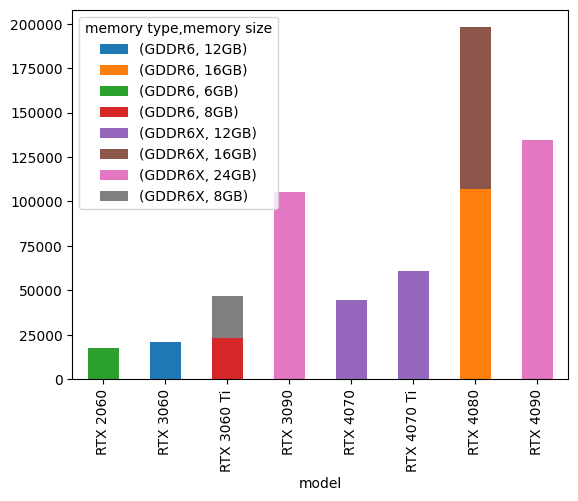

In [208]:
pivotexpensive.plot.bar(stacked=True)

In [209]:
top10cheapestmodels_df = top10cheapestmodels_df.nsmallest(10, 'price')
top10cheapestmodels_df

,model,memory size,memory type,price
2,GT 730,2GB,GDDR5,3600.000000
1,GT 1030,2GB,GDDR5,4500.000000
21,RX 560,4GB,GDDR5,7500.000000
5,GTX 1630,4GB,GDDR6,8147.500000
4,GTX 1050T,4GB,GDDR5,9400.000000
3,GTX 1050 Ti,4GB,GDDR5,9500.000000
22,RX 6400,4GB,GDDR6,9500.000000
23,RX 6500 XT,4GB,GDDR6,9800.000000
6,GTX 1650,4GB,GDDR5,10080.000000
7,GTX 1650,4GB,GDDR6,10572.222222


In [210]:
pivot = pd.pivot_table(data=top10cheapestmodels_df, index=['model'], columns=['memory type', 'memory size'], values='price')
pivot

memory type   GDDR5                  GDDR6
memory size     2GB      4GB           4GB
model                                     
GT 1030      4500.0      NaN           NaN
GT 730       3600.0      NaN           NaN
GTX 1050 Ti     NaN   9500.0           NaN
GTX 1050T       NaN   9400.0           NaN
GTX 1630        NaN      NaN   8147.500000
GTX 1650        NaN  10080.0  10572.222222
RX 560          NaN   7500.0           NaN
RX 6400         NaN      NaN   9500.000000
RX 6500 XT      NaN      NaN   9800.000000

<Axes: xlabel='model'>

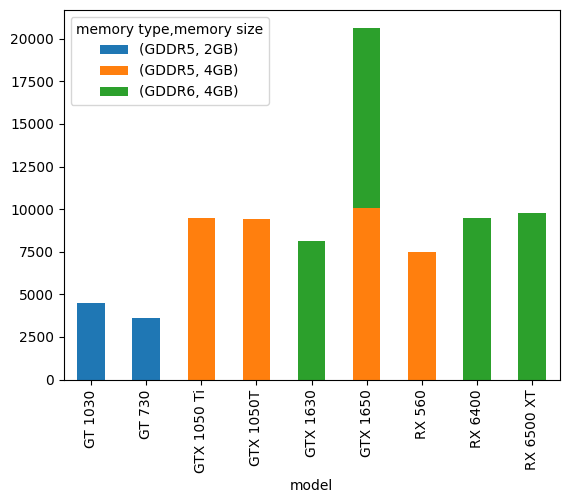

In [211]:
pivot.plot.bar(stacked=True)

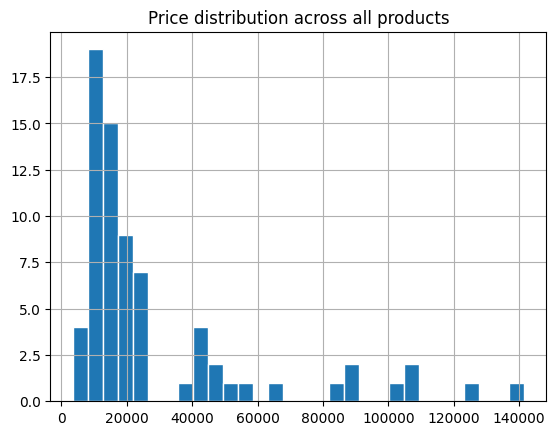

In [212]:
gpu_df.hist('price', bins=30, edgecolor='w')
plt.title('Price distribution across all products')
plt.show()